In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('bank-subscribed_19.csv')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# 1.a) Analyse data types of features and verify they hold data same as that of their datatype. Update if required.

In [2]:
print(df.dtypes, df.shape)
print(len(df.columns))

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact      float64
day            int64
month         object
duration       int64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
Target        object
dtype: object (8041, 17)
17


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [4]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'Target']] = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'Target']].astype('category')

In [5]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact       float64
day             int64
month        category
duration        int64
campaign      float64
pdays         float64
previous      float64
poutcome      float64
Target       category
dtype: object

In [6]:
df['age'].unique()
# df['marital'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20], dtype=int64)

# 1b.) Checking for NAN Values in data using .isna

In [7]:
# Handling Missing values (NaN)
print(df.isna())

        age    job  marital  education  default  balance  housing   loan  \
0     False  False    False      False    False    False    False  False   
1     False  False    False      False    False    False    False  False   
2     False  False    False      False    False    False    False  False   
3     False  False    False       True    False    False    False  False   
4     False   True    False       True    False    False    False  False   
...     ...    ...      ...        ...      ...      ...      ...    ...   
8036  False  False    False      False    False    False    False  False   
8037  False  False    False      False    False    False    False  False   
8038  False  False    False      False    False    False    False  False   
8039  False  False    False      False    False    False    False  False   
8040  False  False    False      False    False    False    False  False   

      contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        

In [8]:
print(df.isna().sum())

age             0
job            22
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      8041
day             0
month           0
duration        0
campaign        1
pdays           1
previous        1
poutcome     8041
Target          1
dtype: int64


In [9]:
df.dropna( axis=1, thresh = 8041, inplace=True) ### To drop columns with missing values
print(df.shape)
df

(8041, 9)


,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


In [10]:
print(df.isna().sum())

age         0
marital     0
default     0
balance     0
housing     0
loan        0
day         0
month       0
duration    0
dtype: int64


# 2a.) Check for duplicated, view duplicated rows and remove them if any

In [11]:
df.duplicated().sum()

1

In [12]:
# To view duplicated rows
print(df[df.duplicated()])

     age  marital default  balance housing loan  day month  duration
461   39  married      no        0     yes   no    6   may       262


In [13]:
df = df.drop_duplicates(keep='last')
df.shape

(8040, 9)

In [14]:
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


# 2b.) Check for outliers using boxplot and statistical methods, and remove them if any

In [15]:
df.describe()

,age,balance,day,duration
count,8040.000000,8040.000000,8040.000000,8040.000000
mean,39.446891,1013.120896,17.555846,264.993532
std,9.245510,2470.356113,8.284656,249.787869
min,20.000000,-3372.000000,2.000000,0.000000
25%,32.000000,40.000000,9.000000,118.000000
50%,38.000000,323.000000,16.000000,193.000000
75%,46.000000,1026.000000,26.000000,322.000000
max,61.000000,58544.000000,30.000000,3366.000000


<Axes: ylabel='age'>

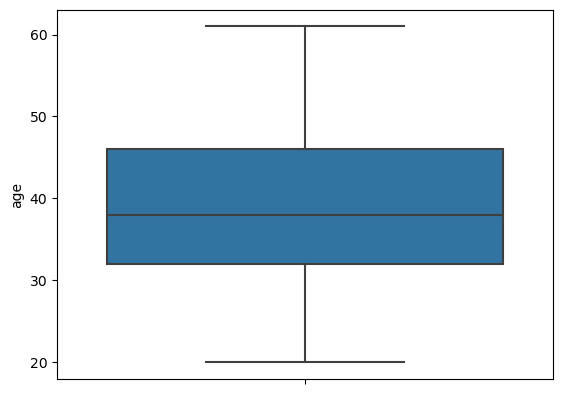

In [16]:
sns.boxplot(y='age', data= df )

In [17]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df.quantile(0.25, numeric_only=True)
q1

age          32.0
balance      40.0
day           9.0
duration    118.0
Name: 0.25, dtype: float64

In [18]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df['age'].quantile(0.25)
q1

32.0

In [19]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS using QUANTILES
q1 = np.quantile(df['age'], 0.25)
q3 = np.quantile(df['age'], 0.75)
print(q1, q3)
IQR = q3-q1
IQR

32.0 46.0


14.0

In [20]:
### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit, upper_limit)

11.0 67.0


In [21]:
print("There is no outlier in the DataFrame")

There is no outlier in the DataFrame


# 2c.) For categorical features, draw countplot. Write your observations

<Axes: xlabel='marital', ylabel='count'>

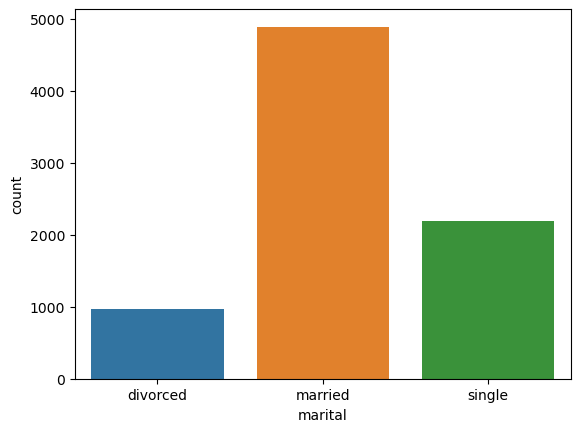

In [22]:
sns.countplot(x='marital', data=df)

In [23]:
print("It is observed that married people are the most populous with the total count of about 4,950. The singles are the next populous with the population count of about 2,200. While the divorced are the list in the categories with the count of about 1,100")

It is observed that married people are the most populous with the total count of about 4,950. The singles are the next populous with the population count of about 2,200. While the divorced are the list in the categories with the count of about 1,100


# 2d.) For numeric features, draw a histogram. Compute and about skewness of variables and apply transformation function if needed

In [24]:
df.skew(numeric_only=True)

age         0.405577
balance     8.203716
day        -0.007051
duration    3.101671
dtype: float64

<Axes: xlabel='age', ylabel='Count'>

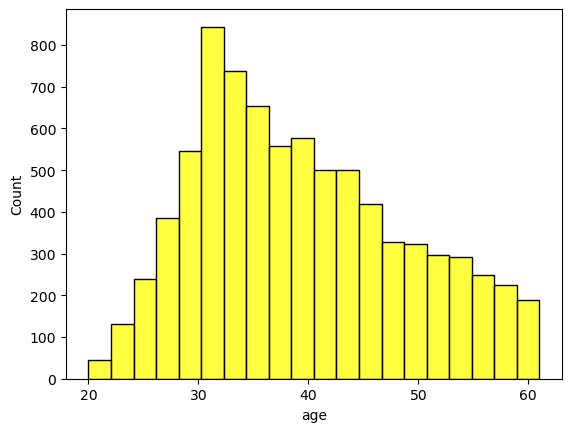

In [25]:
sns.histplot(data=df, x='age', bins=20, color='yellow')

In [26]:
df.skew(numeric_only=True)

age         0.405577
balance     8.203716
day        -0.007051
duration    3.101671
dtype: float64

In [27]:
print(df['balance'].describe())
df['balance'].value_counts()

count     8040.000000
mean      1013.120896
std       2470.356113
min      -3372.000000
25%         40.000000
50%        323.000000
75%       1026.000000
max      58544.000000
Name: balance, dtype: float64


 0       465
 1        36
 2        28
 6        22
 3        22
        ... 
 4168      1
 4574      1
-613       1
 1511      1
 3249      1
Name: balance, Length: 3076, dtype: int64

323.0
58544
-3372
1013.1208955223881
The balance feature seems to be skewed
8.203715545691205
The balance feature is right skewed


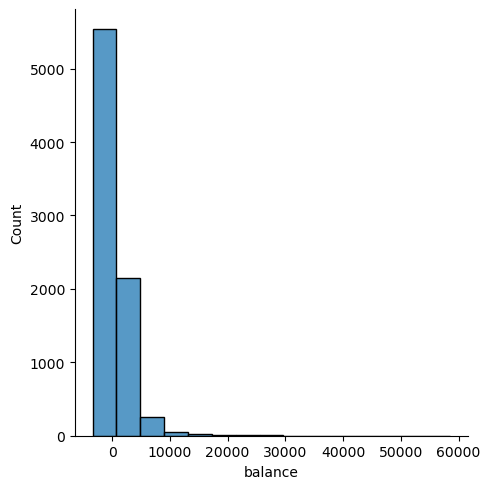

In [28]:
sns.displot(x='balance', data=df, bins=15)
print(df['balance'].median())
print(df['balance'].max())
print(df['balance'].min())
print(df['balance'].mean())
print("The balance feature seems to be skewed")

### Computation of skewness
print(df['balance'].skew())
print("The balance feature is right skewed")

c:\Users\USER\anaconda3\anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\USER\anaconda3\anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


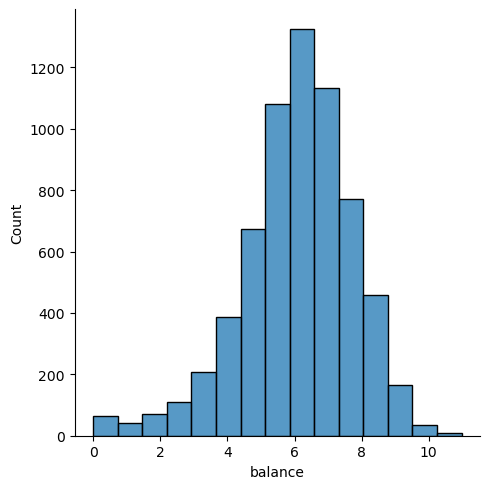

In [29]:
## Applying transformation function to skewed variable
balance_log = np.log(df['balance'] )
balance_log
sns.displot(x=balance_log, bins=15)

# 3a.) Come up with scatter plot with hue parameter. Write your observations from the plot.

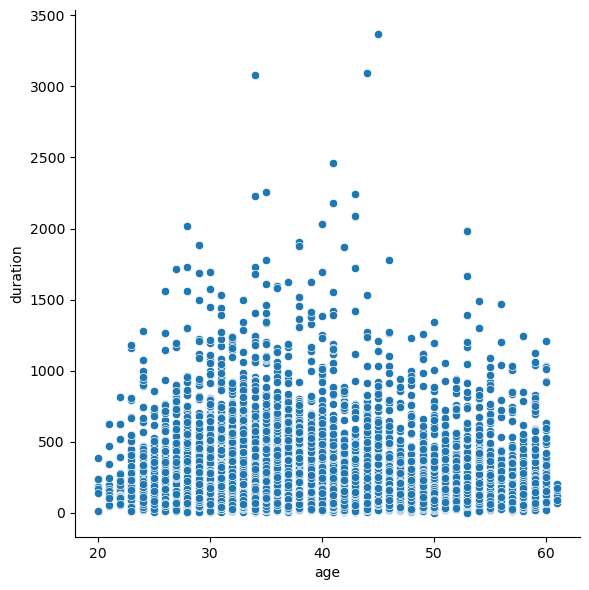

In [30]:
sns.relplot (data = df, x="age", y="duration", height=6, aspect=1)

In [31]:
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


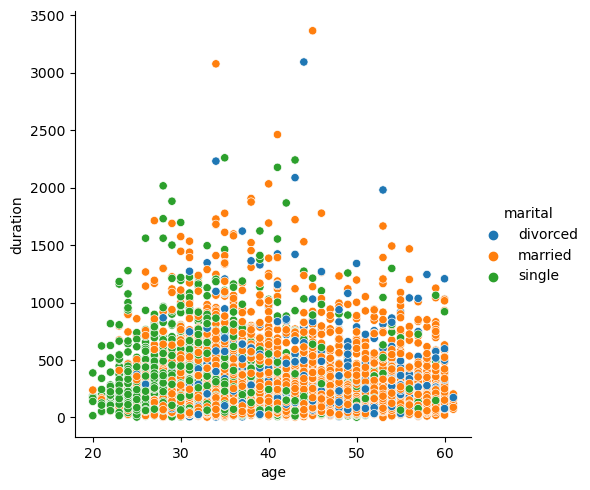

In [32]:
sns.relplot (data = df, x="age", y="duration", hue="marital")

In [33]:
# Observations
print("Most of the singles fall within the age bracket 20 - 35 with few others who are yet to marry within the age bracket 36 - 60. Large number of the married people fall within the age bracket 32 - 60. While the divorced people are mostly found within the age bracket 30 - 60")

Most of the singles fall within the age bracket 20 - 35 with few others who are yet to marry within the age bracket 36 - 60. Large number of the married people fall within the age bracket 32 - 60. While the divorced people are mostly found within the age bracket 30 - 60


# 3b.) Compute correlation among independent features and demonstrate it using heatmap.

In [34]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,age,balance,day,duration
age,1.000000,0.056218,-0.132600,-0.043351
balance,0.056218,1.000000,0.072668,0.040538
day,-0.132600,0.072668,1.000000,-0.015412
duration,-0.043351,0.040538,-0.015412,1.000000


<Axes: >

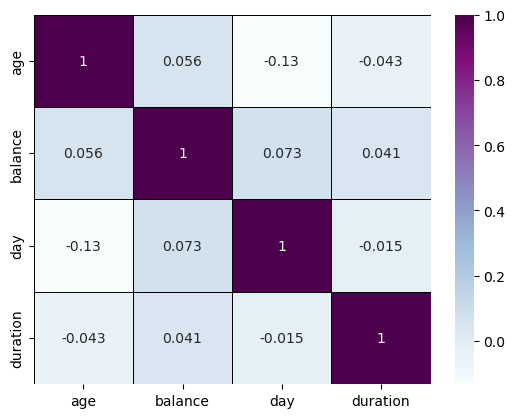

In [35]:
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', lw=0.7, linecolor='Black')

# 3c.) Apply any scaling method to at least two independents features.

In [36]:
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
print(df['age'].max(), df['age'].min()) ## MinMaxScaler

61 20


In [39]:
print(df['balance'].max(), df['balance'].min()) ## MinMaxScaler

58544 -3372


# 3d.) Convert categorical features into numeric ones using appropriate encoding techniques.

In [40]:
df.dtypes

age            int64
marital     category
default     category
balance        int64
housing     category
loan        category
day            int64
month       category
duration       int64
dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder
print(df['marital'].unique(), df['default'].unique(), df['housing'].unique())

['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single'] ['no', 'yes']
Categories (2, object): ['no', 'yes'] ['yes', 'no']
Categories (2, object): ['no', 'yes']


In [42]:
df.loc['marital']= df['marital'].astype('category')
df.loc['default']= df['default'].astype('category')
df.loc['housing'] = df['housing'].astype('category')
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8039,32,married,no,109,yes,no,2,jun,364
8040,35,single,no,608,yes,yes,2,jun,227
marital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = df.dropna()
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


# 4.) Compute correlation of each independence feature with dependent variable target. Select seven most important independent features from the set

In [44]:
df.dtypes

age           object
marital     category
default     category
balance       object
housing     category
loan        category
day           object
month       category
duration      object
dtype: object

In [45]:
# List of columns to convert to integers
columns_to_convert = ['age', 'balance', 'day', 'duration']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
print(df.dtypes)

age             int8
marital     category
default     category
balance        int32
housing     category
loan        category
day             int8
month       category
duration       int16
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_12804\1285266323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')


In [46]:
df

,age,marital,default,balance,housing,loan,day,month,duration
0,58,married,no,2143,yes,no,5,may,261
1,44,single,no,29,yes,no,5,may,151
2,33,married,no,2,yes,yes,5,may,76
3,47,married,no,1506,yes,no,5,may,92
4,33,single,no,1,no,no,5,may,198
...,...,...,...,...,...,...,...,...,...
8036,45,married,no,759,yes,no,2,jun,172
8037,29,single,no,144,yes,no,2,jun,105
8038,39,divorced,no,892,yes,no,2,jun,26
8039,32,married,no,109,yes,no,2,jun,364


In [47]:
# Using one-hot encoding for categorical columns
categorical_columns = ['marital', 'default', 'housing', 'loan', 'month']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Calculate the correlation between each feature (including one-hot encoded columns) and the target variable
correlations = df_encoded.corr()['age']
print(correlations)

age                 1.000000
balance             0.056218
day                -0.132600
duration           -0.043351
marital_divorced    0.181194
marital_married     0.231498
marital_single     -0.385962
default_no          0.027096
default_yes        -0.027096
housing_no          0.057348
housing_yes        -0.057348
loan_no             0.026567
loan_yes           -0.026567
month_jun           0.008926
month_may          -0.008926
Name: age, dtype: float64


# 5.) Consider 'target' column is prediction variable. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 7 features

In [48]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
df_encoded = df_encoded[['age', 'balance', 'day', 'duration', 'marital_divorced', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_jun', 'month_may']]
df_encoded

,age,balance,day,duration,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_jun,month_may
0,58,2143,5,261,0,1,0,1,0,0,1,1,0,0,1
1,44,29,5,151,0,0,1,1,0,0,1,1,0,0,1
2,33,2,5,76,0,1,0,1,0,0,1,0,1,0,1
3,47,1506,5,92,0,1,0,1,0,0,1,1,0,0,1
4,33,1,5,198,0,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,759,2,172,0,1,0,1,0,0,1,1,0,1,0
8037,29,144,2,105,0,0,1,1,0,0,1,1,0,1,0
8038,39,892,2,26,1,0,0,1,0,0,1,1,0,1,0
8039,32,109,2,364,0,1,0,1,0,0,1,1,0,1,0


In [50]:
# Separate the features (X) and the target variable (y):
X = df_encoded.drop('month_may', axis=1)
y = df_encoded['month_may']

In [51]:
final = df_encoded.drop(['default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_jun', 'month_may'],axis='columns')
final

,age,balance,day,duration,marital_divorced,marital_married,marital_single
0,58,2143,5,261,0,1,0
1,44,29,5,151,0,0,1
2,33,2,5,76,0,1,0
3,47,1506,5,92,0,1,0
4,33,1,5,198,0,0,1
...,...,...,...,...,...,...,...
8036,45,759,2,172,0,1,0
8037,29,144,2,105,0,0,1
8038,39,892,2,26,1,0,0
8039,32,109,2,364,0,1,0
